In [1]:
import tensortools as tt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ground truth model
N, R = 20, 3
softplus = lambda x: np.log(1 + np.exp(x))
factors = [softplus(np.random.randn(N, R)) for _ in range(3)]

# noisy data
data = np.einsum('ir,jr,kr->ijk', *factors) # low-rank part
data += 0.1*np.random.randn(*data.shape) # add noise

In [3]:
sparse_results = tt.cp_batch_fit(data, R, replicates=3, tol=1e-6, sparsity_penalty=0.01, min_time=4)
sparse_factors = sparse_results[R]['factors'][0]
sparse_factors = tt.align_factors(sparse_factors, factors)[0]

Optimizing rank-3 models.
   fitting replicate: 2/3    iter=28, error=0.1939, variation=0.0127

/Users/alex/anaconda/envs/tf/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


   0/3 converged, min error = 0.1959, max error = 0.2053, mean error = 0.2021


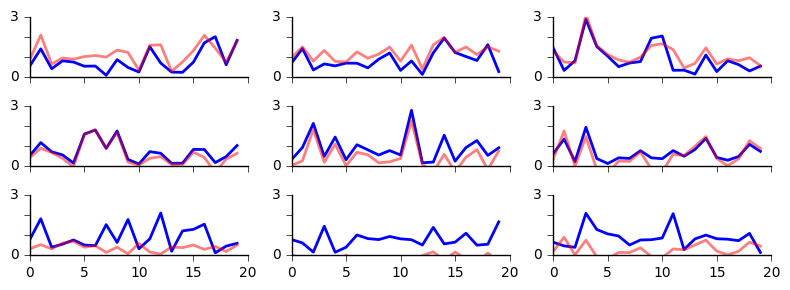

In [4]:
fig, axes = tt.plot_factors(factors, line_kw=dict(color='b', lw=2))
tt.plot_factors(sparse_factors, line_kw=dict(color='r', lw=2, alpha=0.5), fig=fig);